# Dataset
The dataset used for Analysis is taken from the Source: 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook. 

Data is having Data has 26 Attributes, it has missing values as ‘?’, Datatypes of Column: normalized-losses, Horsepower & Price are Object they should be an integer.
This data set consists Specification Details, Risk Rating & relative average loss payment per insured vehicle year.

Objective of this Analysis to get idea on:
•	Which factors affecting the price?

•	Which type of vehicles are mostly produced?

•	What is the risk level of various models? 

•	Which are the Various Manufacturers producing the Vehicles?


In [1]:
#importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df=pd.read_csv(r"Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Tools & Libraries   
Python • Jupyter Notebook • Pandas • Numpy • Seaborn • Matplotlib • Plotly &
Cufflinks


# Data Description:
The dataset contains the following Columns:
•	Symboling: - Risk Level of Vehicle, varies from -3 (Low) to +3 (High)

•	Normalized-losses: - Relative average loss payment per insured vehicle year

•	Make: - Manufacturer Name 

•	Fuel-type: - Fuel type used for Vehicle

•	Aspiration: - Engine Aspiration (i.e., Standard & Turbo) 

•	Num-of-doors: - Number of Doors available to Vehicle

•	Body-style: - Type of Vehicle Body

•	Drive-wheels: - Drive wheel type of Vehicle (FWD, RWD, 4WD) 

•	Engine-location: - Where engine is located in vehicle 

•	Wheel-base: - Size Wheel base

•	Length: - Length of Vehicle in cm

•	Width: - Width of Vehicle in cm

•	Height: - Height of Vehicle in cm

•	Curb-weight: - Curb Weight of Vehicle in kg

•	Engine-type: - Type of engine

•	Num-of-cylinders: - Cylinders used in engine 

•	Engine-size: - Size of Engine in cm

•	Fuel-system: - Fuel System used

•	Bore: - Engine parameter to calculate Displacement

•	Stroke: - Engine parameter to calculate Displacement

•	Compression-ratio: - Compression ratio of engine

•	Horsepower: - Engine Horsepower 

•	Peak-rpm: - Revolution per minute at peak

•	City-mpg: - Miles per gallon in city

•	Highway-mpg: - Miles per gallon on Highway

•	Price: - Price of Vehicle


# Data Cleaning

In [5]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [6]:
#Removing ? form the Dataset & Converting in to Integer
df = df.loc[df['normalized-losses'] != '?']
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['normalized-losses'].unique()

array([164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110., 145.,
       137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129., 115.,
        93., 142., 161., 153., 125., 128., 122., 103., 168., 108., 194.,
       231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,  91.,
       134.,  65., 197.,  90.,  94., 256.,  95.])

In [7]:
#Converting price column in to Integer
df['price']=df['price'].astype(float)
df['price'].unique()

array([13950., 17450., 17710., 23875., 16430., 16925., 20970., 21105.,
        5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,  6692.,
        7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,  6529.,
        7129.,  7295.,  7895.,  9095.,  8845., 10295., 12945., 10345.,
       32250.,  5195.,  6095.,  6795.,  6695.,  7395., 10945., 11845.,
       13645., 15645.,  8495., 10595., 10245., 11245., 18280., 25552.,
       28248., 28176., 31600., 35056.,  5389.,  6189.,  6669.,  7689.,
        9959.,  8499.,  6989.,  8189.,  9279.,  5499.,  7099.,  6649.,
        6849.,  7349.,  7299.,  7799.,  7499.,  7999.,  8249.,  8949.,
        9549., 13499., 14399., 17199., 19699., 18399., 11900., 13200.,
       15580., 16900., 16630., 17950., 18150., 22018., 11850., 12170.,
       15040., 15510., 18620.,  5118.,  7053.,  7603.,  7126.,  7775.,
        9960.,  9233., 11259.,  7463., 10198.,  8013., 11694.,  5348.,
        6338.,  6488.,  6918.,  7898.,  8778.,  6938.,  7198.,  7788.,
      

In [8]:
#Converting horsepower column in to Integer
df['horsepower']=df['horsepower'].astype(float)
df['horsepower'].unique()

array([102., 115., 110., 140., 101., 121.,  48.,  70.,  68.,  88., 145.,
        58.,  76.,  60.,  86., 100., 176., 135.,  84., 120., 123., 155.,
       116.,  69.,  55.,  97., 152., 160., 200.,  95., 142., 143.,  73.,
        82.,  94., 111.,  62.,  56., 112.,  92., 161., 156.,  52.,  85.,
        90., 114., 162., 134., 106.])

In [9]:
df = df.rename(columns={'normalized-losses':'loss', 'body-style':'body'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          164 non-null    int64  
 1   loss               164 non-null    float64
 2   make               164 non-null    object 
 3   fuel-type          164 non-null    object 
 4   aspiration         164 non-null    object 
 5   num-of-doors       164 non-null    object 
 6   body               164 non-null    object 
 7   drive-wheels       164 non-null    object 
 8   engine-location    164 non-null    object 
 9   wheel-base         164 non-null    float64
 10  length             164 non-null    float64
 11  width              164 non-null    float64
 12  height             164 non-null    float64
 13  curb-weight        164 non-null    int64  
 14  engine-type        164 non-null    object 
 15  num-of-cylinders   164 non-null    object 
 16  engine-size        164 non

# Finding Outliers

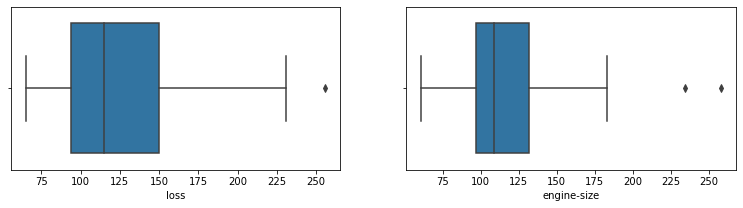

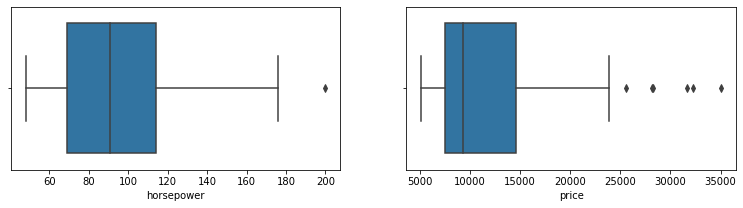

In [11]:
num_cols = ['loss','engine-size','horsepower','price']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

# Working with the Outliers
Dataset has Outliers in Normalized Losses, Engine Size, Horsepower & Price

In [12]:
#Checking for Outliers
df['engine-size'].quantile(0.99)

201.87000000000023

In [13]:
df[df['engine-size'] > df['engine-size'].quantile(0.99)].sort_values(by="engine-size",ascending=False)

,symboling,loss,make,fuel-type,aspiration,num-of-doors,body,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750,15,19,32250.0
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.1,8.3,155.0,4750,16,18,35056.0


##### Jaguar and Mercedes-benz having highest engine Size 258 & 234 Respectively

In [14]:
df['loss'].quantile(0.99)

209.58000000000015

In [15]:
df[df['loss'] > df['loss'].quantile(0.99)].sort_values(by="loss",ascending=False)

,symboling,loss,make,fuel-type,aspiration,num-of-doors,body,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
190,3,256.0,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90.0,5500,24,29,9980.0
106,1,231.0,nissan,gas,std,two,hatchback,rwd,front,99.2,...,181,mpfi,3.43,3.27,9.0,160.0,5200,19,25,18399.0


##### Volksvagon & Nissan having more relative average loss, 256 & 231 respectively.

In [16]:
df['horsepower'].quantile(0.99)

167.18000000000006

In [17]:
df[df['horsepower'] > df['horsepower'].quantile(0.99)].sort_values(by="horsepower",ascending=False)

,symboling,loss,make,fuel-type,aspiration,num-of-doors,body,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
105,3,194.0,nissan,gas,turbo,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200.0,5200,17,23,19699.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750,15,19,32250.0


##### Nissan and Jaguar having highest horse power

In [18]:
df['price'].quantile(0.99)

31840.500000000004

In [19]:
df[df['price'] > df['price'].quantile(0.99)].sort_values(by="price",ascending=False)

,symboling,loss,make,fuel-type,aspiration,num-of-doors,body,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
72,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.1,8.3,155.0,4750,16,18,35056.0
47,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176.0,4750,15,19,32250.0


##### Jaguar and Mercedes-benz having highest price 

# Vehicle Make Frequency Diagram

In [20]:
df["make"].value_counts().sort_values(ascending=False).iplot(kind="bar")

##### Toyoto has produced most Vehicles

# Makewise Average Risk Rating 

In [21]:
risk_rate=df.groupby('make',as_index=False).symboling.mean()
risk_rate.iplot(x='make',y='symboling',kind='bar')

###### Volvo has Low Risk -1.27& porsche has highest risk 3

# Make Wise relative average loss payment per insured vehicle year

In [22]:
Loss_make=df.groupby('make',as_index=False).loss.mean()
Loss_make.iplot(x='make',y='loss',kind='bar')

##### BMW has highest relative average loss payment per insured vehicle year = 190

# Make wise average Price

In [23]:
make_wise_price = df.groupby('make',as_index=False).price.mean()
make_wise_price.iplot(x='make',y='price',kind='bar')

##### Jaguar has highest price 32.25K

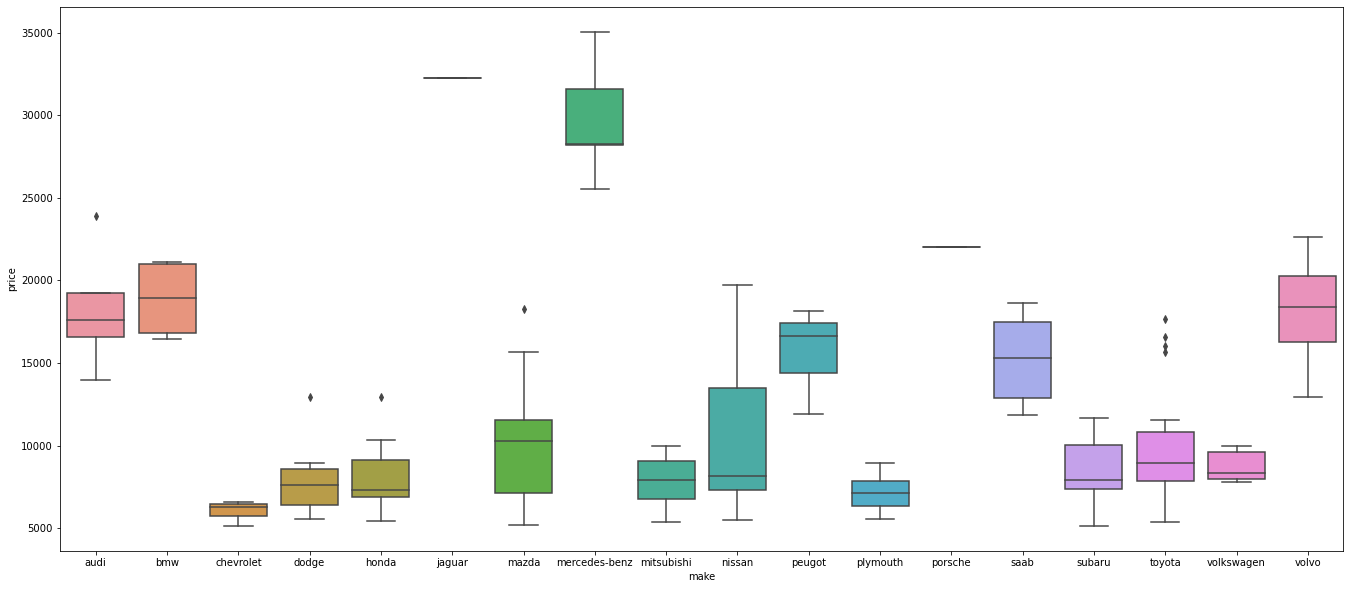

In [24]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=df)

# Which Type of Fuel used Cars are More?

In [25]:
fuel_type=df.groupby(by="fuel-type")

In [26]:
fuel_type.price.mean().sort_values(ascending=False).iplot(kind="bar")

##### Diesel Vehicles are More

# Fuel Type Wise Price

In [27]:
FuelType_wise_price = df.groupby('fuel-type',as_index=False).price.mean()
FuelType_wise_price.iplot(x='fuel-type',y='price',kind='bar')

##### Diesel Vehicle has highest Price = average 16.18K

# Body Type Wise Average Horsepower

In [28]:
body_wise_horsepower = df.groupby('body',as_index=False).horsepower.mean()
body_wise_horsepower.iplot(x='body',y='horsepower',kind='bar')

##### Convertible Vehicles has highest horsepower

# Body Type Wise Average Price

In [29]:
body_wise_price = df.groupby('body',as_index=False).price.mean()
body_wise_price.iplot(x='body',y='price',kind='bar')

##### Convertible Vehicles has highest Price

# Drive Wheel Wise Vehicle Count

In [30]:
df['drive-wheels'].value_counts().iplot(kind="bar")

##### Front Wheel Drive Vehicle are mostly produced

# Engine Size wise Price

C:\Users\Tulashiram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



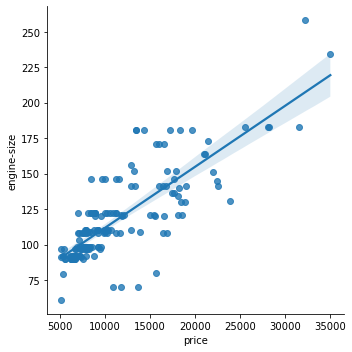

In [31]:
g = sns.lmplot('price',"engine-size", df)

# Conclusion
Analysis of Data Provides:
1.Dataset has Outliers in Normalized Losses, Engine Size, Horsepower & Price.

2.Jaguar and Mercedes-benz having highest engine Size 258 & 234 Respectively.

3.Volksvagon & Nissan having more relative average loss, 256 & 231 respectively.

4.Jaguar and Mercedes-benz having highest price.

5.Toyoto has produced most Vehicles.

6.Volvo has average Low Risk=-1.27& porsche has average highest risk=3.

7.BMW has highest relative average loss payment per insured vehicle year = 190

8.Jaguar has highest average price 32.25K.

9.Diesel Vehicles are Mostly produced in that year.

10.Diesel Vehicle has highest Price compare to gas vehicle.

11.Convertible Vehicles has highest horsepower & Price compare to hatchback, wagon, hardtop and sedan

12.Front Wheel Drive Vehicle are mostly produced compare to Rare Wheel and Four Wheel Drive Vehicles